## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

## Read dataset with pandas (python)

In [7]:
my_data = pd.read_csv("D:\Dataset\A_Z Handwritten Data.csv").astype('float32')
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
my_frame = pd.DataFrame(my_data)
my_frame.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
my_frame.shape

(372450, 785)

In [12]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [13]:
my_frame.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.736685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490786,0.517295,0.421331,0.419179,0.385566,0.319819,0.208941,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [9]:
my_frame.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

## Split x and y column from dataset

In [15]:
x = my_frame.drop('0', axis = 1)
y = my_frame['0']

## Reshaping images from dataset

In [16]:
# we are reshaping the train & test image data so that they can be displayed as an image, 
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


## Creating dictionary  of alphabets with indexes

In [17]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

## Plotting number of alphabets from dataset

TypeError: 'AxesSubplot' object is not subscriptable

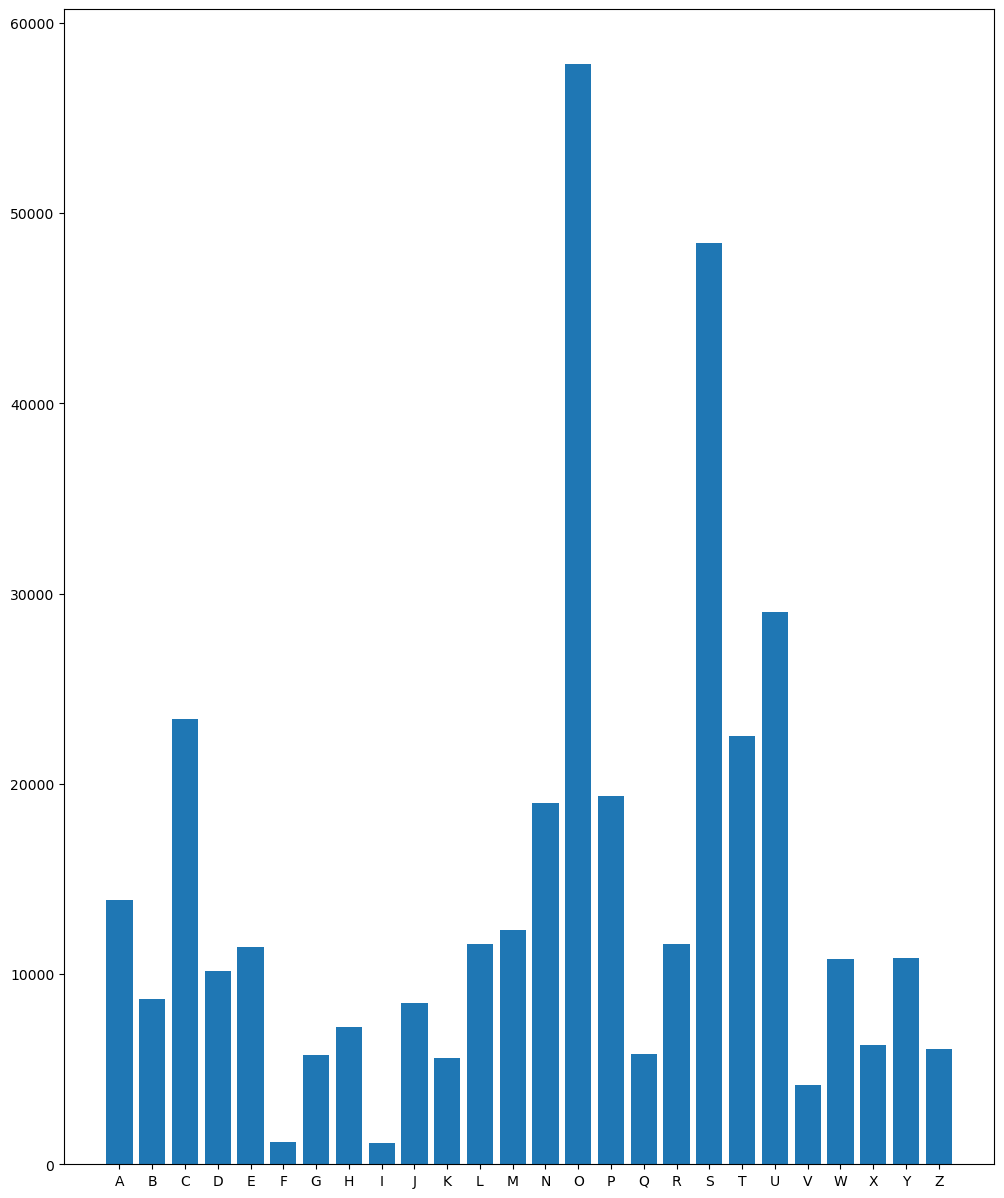

In [18]:
plt.style.use('default')
# plt.xkcd()
y_integer = np.int0(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (12, 15))
ax.bar(alphabets, count)
ax[0].grid(False)
plt.xlabel('Number Of Elements', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

## Shuffle images from dataset with shuffle() function to show random images

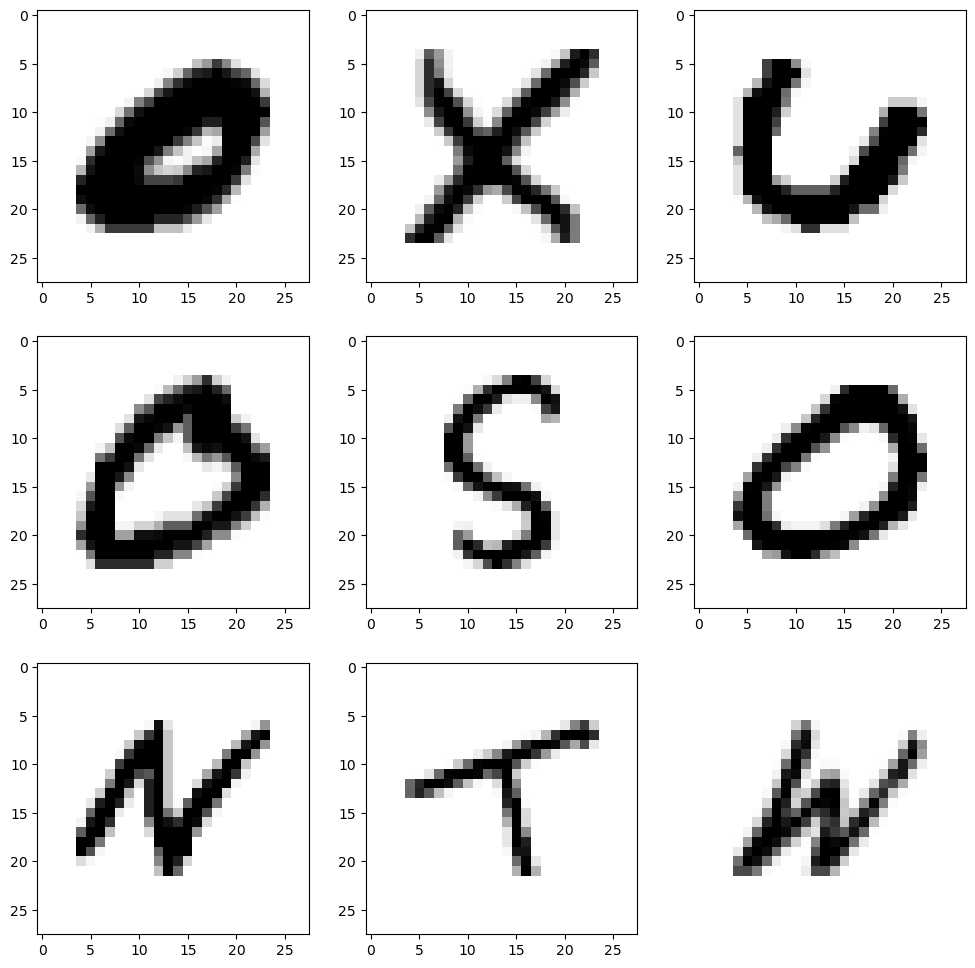

In [14]:
# Now we shuffle the data with the shuffle() function to show the random images..

plt.style.use('default')
# plt.xkcd()

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (12, 12))
axes = ax.flatten()
plt.axis(False)

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()


### Thay đổi lại kích thước ảnh

In [15]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2])
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28)
New shape of test data: (74490, 28, 28)


## Convert float values into categorical values

In [16]:
categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


## Implementation of Deep Learning Model

In [4]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

## Compiling the Model

In [32]:
my_model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 10, validation_data = (x_test, categorical_test))

SyntaxError: invalid syntax (1797629294.py, line 6)

In [100]:
b = x_test[0]
b = b.reshape(1, 28, 28)

In [102]:
my_model.predict(x=b)

1/1 [==============================] - 0s 23ms/step


array([[4.54656535e-10, 1.17950127e-12, 1.73965269e-08, 4.42686954e-09,
        1.16342060e-12, 4.81692865e-13, 9.23954164e-13, 1.20991740e-06,
        6.33107153e-16, 2.06311168e-09, 8.67074815e-12, 4.17948618e-12,
        1.18776436e-04, 9.99633431e-01, 9.62916431e-08, 2.94267153e-07,
        1.72009450e-07, 8.01794449e-05, 8.20461707e-07, 6.67016876e-12,
        3.25959171e-08, 1.06657377e-10, 1.64934943e-04, 8.09307621e-11,
        7.05354612e-12, 5.81638210e-12]], dtype=float32)

In [101]:
x_test[1:2].shape

(1, 28, 28)

## Getting summary of Model

In [5]:
my_model.summary()
my_model.save(r'D:\model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                        

## Find accuracy, losses of Model

In [44]:
# we print out the training & validation accuracies along with the training & validation losses for character recognition.

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9662639498710632]
The training accuracy is : [0.9351691603660583]
The validation loss is : [0.11997709423303604]
The training loss is : [0.2451881617307663]


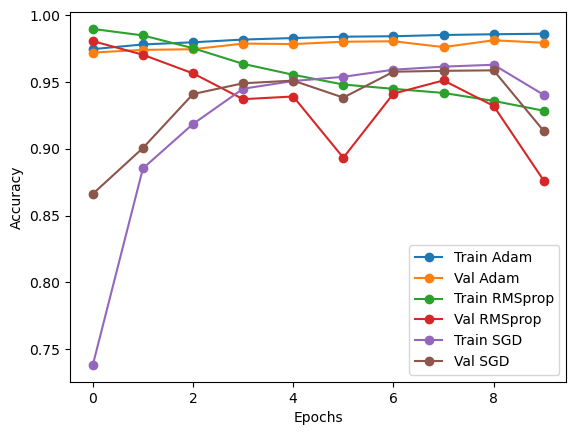

In [29]:
import matplotlib.pyplot as plt

plt.plot(adam_acc, '-o')
plt.plot(adam_val_acc, '-o')
plt.plot(rms_acc, '-o')
plt.plot(rms_val_acc, '-o')
plt.plot(sgd_acc, '-o')
plt.plot(sgd_val_acc, '-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Adam', 'Val Adam', 'Train RMSprop', 'Val RMSprop', 'Train SGD', 'Val SGD'])
plt.show()

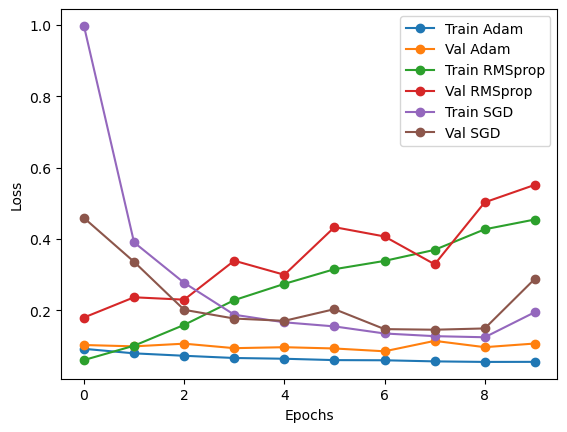

In [31]:
import matplotlib.pyplot as plt

plt.plot(adam_loss, '-o')
plt.plot(adam_val_loss, '-o')
plt.plot(rms_loss, '-o')
plt.plot(rms_val_loss, '-o')
plt.plot(sgd_loss, '-o')
plt.plot(sgd_val_loss, '-o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Adam', 'Val Adam', 'Train RMSprop', 'Val RMSprop', 'Train SGD', 'Val SGD'])
plt.show()

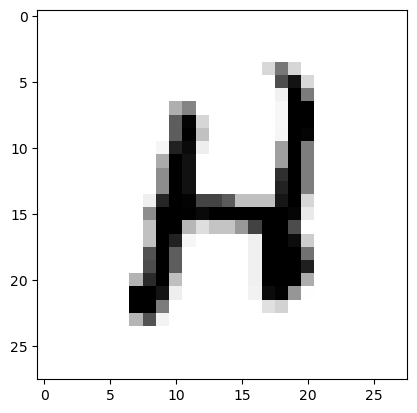

In [45]:
plt.imshow(x_train[0], cmap= 'Greys')

## Finally, make predictions on the test data

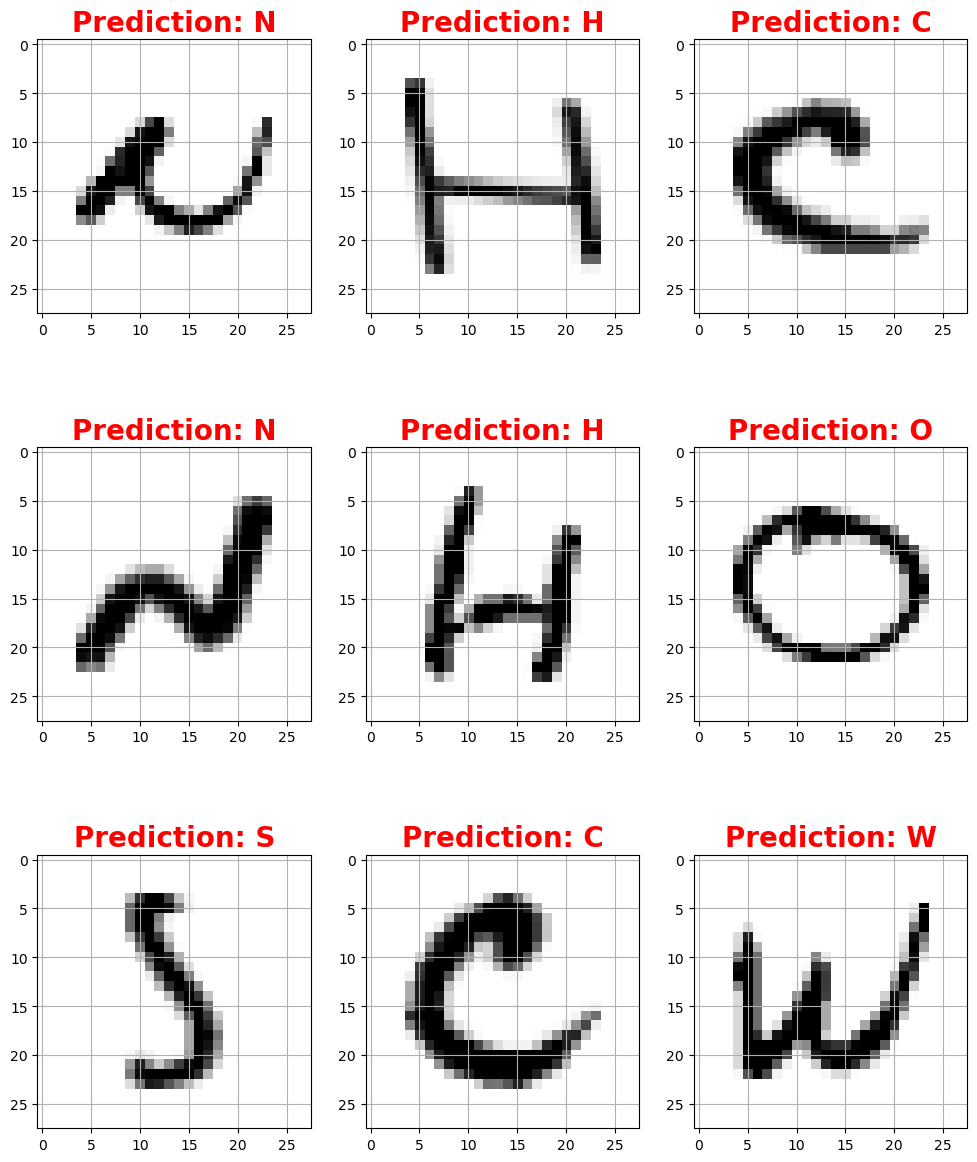

In [23]:
# Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, 
# that are made using the model.predict() function for text recognition.

# plt.style.use('fivethirtyeight')
plt.show()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap= 'Greys')
    
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()